<a href="https://colab.research.google.com/github/jon-nowacki/MachineLearning/blob/main/XGBoost_Simple_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost  Simple Demo

This is literally the simplest XGBoost demo that I can think of.

### Create demo data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# Generating synthetic data with 500 features and 1000 samples
num_samples = 1000
num_features = 500

# Creating synthetic features and target variable using make_classification
X, y = make_classification(n_samples=num_samples, n_features=num_features, random_state=42)

# Creating a DataFrame for the synthetic dataset
columns = [f"Feature_{i}" for i in range(1, num_features + 1)]
df = pd.DataFrame(X, columns=columns)
df['Likelihood_Medical_Spend'] = y

# Displaying the first few rows of the generated dataset
print(df.head())


### Analyze via XGboost

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Assuming 'X' contains the clinical and social variables, and 'y' is the target variable (likelihood of medical spend)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, predictions)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"Classification Report:\n{report}")

# Feature importance
feature_importance = model.feature_importances_
# Visualize feature importance or use it for further analysis


Accuracy: 0.8966666666666666
ROC-AUC: 0.9482222222222223
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       150
           1       0.90      0.89      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



### Visuizalize the top 20 features

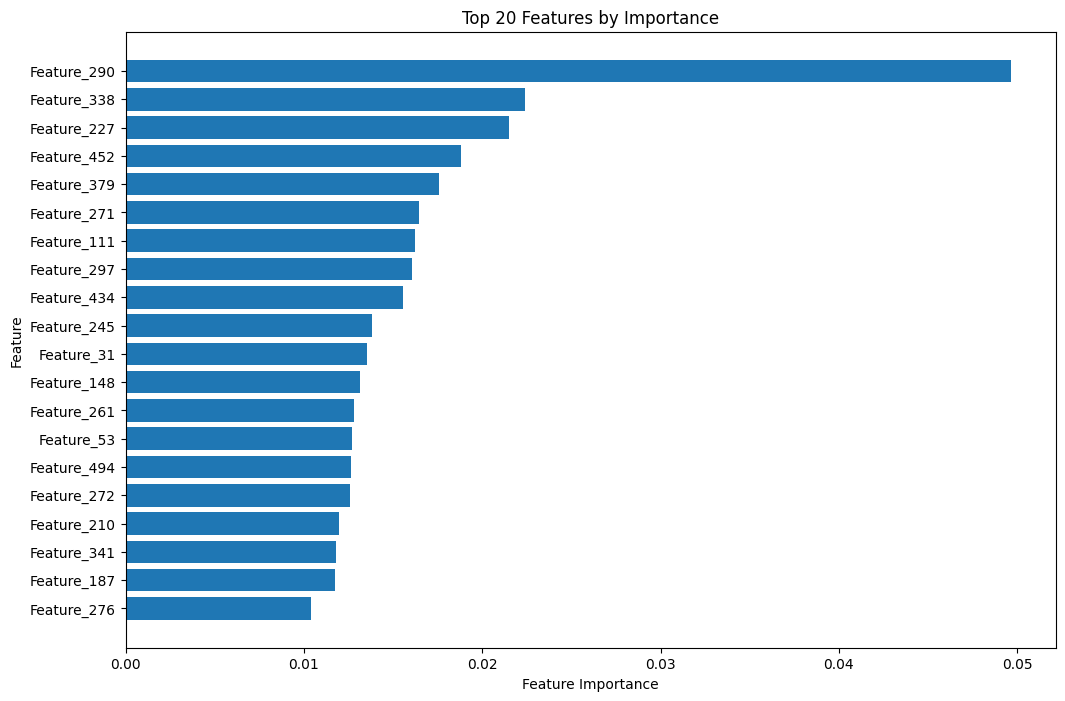

In [3]:
import matplotlib.pyplot as plt

# Assuming 'feature_importance' contains the feature importance scores obtained from XGBoost

# Creating a DataFrame with feature names and their importance scores
feature_names = [f"Feature_{i}" for i in range(1, len(feature_importance) + 1)]
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sorting features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()
